# Making Predictions
### Michelle Wilkerson

##### Introduction

* Background on history of wolves in Yellowstone
    * By the end of the 1920s gray wolves (canis lupus) had disappeared from most of the United States due to loss of habitat and extermination programs.
    * In 1973, Greater Yellowstone was named as one of three recovery areas for the endangered gray wolf.
    
    
* Reintroduction of wolves in Yellowstone
    * From 1995 to 1997, 41 wild wolves from Montana and Canada were released in Yellowstone National Park.
    
    
* Wolves in Yellowstone
    * Wolves in Yellowstone primarily feed on hooved animals, the most common being elk, and more deer and smaller animals during the summer.

##### Hypotheses

* Data
    * Provide some data on elk, other hooved animals, etc. in Yellowstone/Greater Yellowstone


* Students guess how they think wolf population will change.
    
    
* Students guess what they think the impact will be on park (touching on predator-prey interactions)

    * Other prey populations
    * Predator populations
    * Flora populations
    * Why?

##### One Point Model for Predicting Population

* Simplest/most basic method


* Using one single point to predict the population in the following year


* What issues might arise with this method?

##### Linear Regression Model for Predicting Population

* All points
    * Creating regression line using data from every year
    * Use this regression line to predict population in future years

    
* Using N-most recent points
    * Creating regression line using data only from N-most recent years
    * Use this regression line to predict population in future years 
    
    
* Comparison
    * Compare the two models
    * How are they similar? How are they different? How are the findings/conclusions similar or different? What are the pros and cons of each?

##### K-Nearest Neighbor Model for Predicting Population

* What other factors might be related to wolf populations?

    
* Predator-Prey interactions
    * Prey is a very important factor, one of many factors
    * How do predators and their prey affect one another?
        * Predators kill and eat other organisms, their prey
        * Predator runs out of prey, dies out
    * Prey population typically peaks before predator population (usually ¼ of a cycle), natural oscillation
    
    
* Explain K-nearest neighbors (in layman terms)
    

* We can only choose some factors - which should we take into account? Why?


* The factors we chose/will use:
    * Elk population?
    * Bison population?
        * potential source for number of bison: http://ibmp.info/Library/OpsPlans/2016_StatusYellowstoneBisonPopulation_Sep2016.pdf
            * note on usage: population control measures are commonly used in yellowstone for bison

##### Comparison

* Compare all the models
    * Same questions as before
    * Which would you choose to use? Why?

##### Potential Issues with Data, Findings, etc?

##### Conclusion

* Takeaways


* Importance of findings/broader implications
    * Don’t know credible this video is but… https://www.facebook.com/newsnercom/videos/810945719072741/
    * Video in forwards

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from scipy.optimize import minimize
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('wolf_and_elk_in_yellowstone.csv', thousands=',').drop('Notes', axis=1).dropna().reset_index(drop=True)
data.head()

,Year,Elk Population,Wolf Population
0,1994,19045.0,0.0
1,1995,16791.0,0.0
2,1999,14538.0,118.0
3,2000,13400.0,177.0
4,2001,11969.0,227.0


##### regression demo that shows what happens as you include more points in making your prediction

In [3]:
def regressiont(included_points=16):
    
    ignore = 16 - included_points  #indexes to ignore
    
    #prediction values
    yp = data['Wolf Population'][ignore:]
    tp = data['Year'][ignore:]
    
    #values
    y = data['Wolf Population']
    t = data['Year']
    
    #loss function
    def res(pars):
        a, b = pars
        yp_hat = a + b * tp
        res = yp - yp_hat
        return sum(res**2)
    
    #optimal paramters
    a, b = minimize(res, (-6.06621468e+04,   3.04230758e+01)).x
    
    #parameters for constant
    if included_points == 1:
        a, b = 480, 0
    
    y_hat = a + b * t  #precited values
    fitline = [y_hat.iloc[0], y_hat.iloc[-1]]  #fit line end points
    fittime = [t.iloc[0], t.iloc[-1]]  #fit line time values
    
    
    y_prime = a + b * 2013  #predicted point
    
    
    ax1 = plt.scatter(t, y, c='b')  #points
    ax2 = plt.plot(fittime, fitline, 'r--')  #fitline
    ax3 = plt.plot(tp, yp, 'rs')  #points used to predict
    ax4 = plt.scatter(t.iloc[-1] +1, y_prime, c='g', marker='^')  #predicted point
    
    #graph labels
    plt.xticks(t.append(pd.Series([2013]))[::2])
    plt.xlabel('Year')
    plt.ylabel('Wolf Popultion')
    
    #display graph and predicted value
    plt.show()
    print('Predicted 2013 wolf population:', round(y_prime))

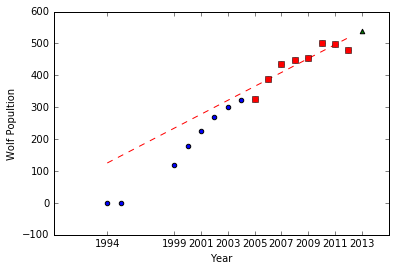

Predicted 2013 wolf population: 540.0


In [4]:
%matplotlib inline
p_slider = widgets.IntSlider(min=1, max=16, step=1, value=1)
w=widgets.interactive(regressiont,included_points=p_slider)
display(w)

The visualation shows the changes in a linear model with no transformations on wolf population over time. The slider chooses how many observtions to include in the model. The blue dots are observations, red squared are observations included in model. red dashed line is fit line, and the green triangle is the predected population from the model for the next year.

I opted to use time instead of elk population because it made the visualization more intuitive with similar results. I also chose to include confidence bands because they also did not add to the narrative. These are options that could be included.

So far I have not found the actual 2013, the predicted year, wolf population to compare the different model memories to but this could be a useful addition

##### Making a graph that shows the points selected for kNN

In [5]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
random_y_values = np.array([2,3,4,5,4,1])

to_predict = [0,0]

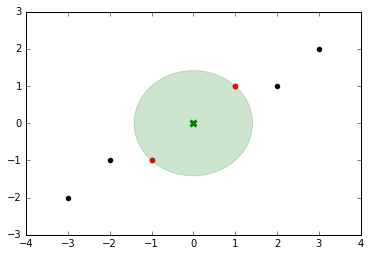

In [6]:
model = KNeighborsRegressor(2)

model.fit(X, random_y_values)
dist, ind = model.kneighbors(to_predict)

fig, ax = plt.subplots()

circle = plt.Circle(to_predict, max(dist[0]), color='g', alpha=.2)
ax.add_artist(circle)

ax.plot(to_predict[0], to_predict[1],'x', color='g', mew=3)

plt.scatter(X[:,0], X[:,1], color='black')


closest_points = X[ind[0]]
x_coords = closest_points.transpose()[0]
y_coords = closest_points.transpose()[1]
plt.scatter(x_coords, y_coords, color='r')

##### Making a graph that shows the points selected for kNN, with hovering annotations -- both kNN in progress

thing to figure out: https://stackoverflow.com/questions/43545050/using-matplotlib-notebook-after-matplotlib-inline-in-jupyter-notebook-doesnt

^ only seems to be a problem sometimes

<IPython.core.display.Javascript object>


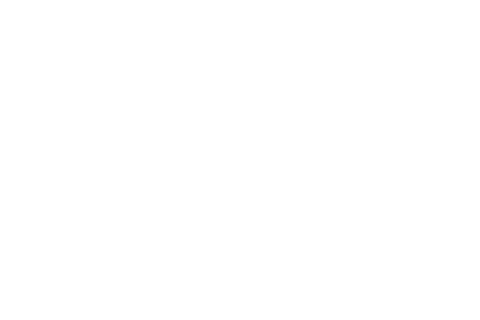

<IPython.core.display.Javascript object>


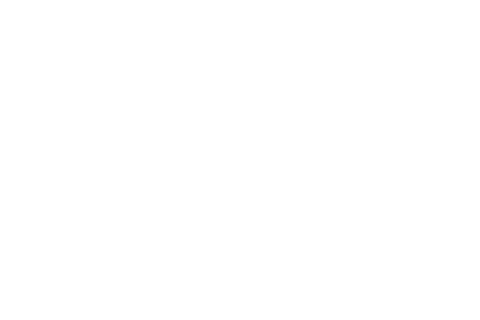

In [7]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes()

# code for hovering over point is from: 
# https://stackoverflow.com/questions/11537374/matplotlib-basemap-popup-box/11556140#11556140

points_with_annotation = []

for i in range(len(X)):
    x_coord = X[i][0]
    y_coord = X[i][1]
    
    point, = plt.plot(x_coord, y_coord, 'o', markersize=10, color='black')

    annotation = ax.annotate("Wolf Population: %s" % i,
        xy=(x_coord, y_coord), xycoords='data',
        xytext=(x_coord + 1, y_coord), textcoords='data',
        horizontalalignment="left",
        arrowprops=dict(arrowstyle="simple",
                        connectionstyle="arc3,rad=-0.2"),
        bbox=dict(boxstyle="round", facecolor="w", 
                  edgecolor="0.5", alpha=0.9)
        )
    # by default, disable the annotation visibility
    annotation.set_visible(False)

    points_with_annotation.append([point, annotation])


def on_move(event):
    visibility_changed = False
    for point, annotation in points_with_annotation:
        should_be_visible = (point.contains(event)[0] == True)

        if should_be_visible != annotation.get_visible():
            visibility_changed = True
            annotation.set_visible(should_be_visible)

    if visibility_changed:        
        plt.draw()

on_move_id = fig.canvas.mpl_connect('motion_notify_event', on_move)

circle = plt.Circle(to_predict, max(dist[0]), color='g', alpha=.2)
ax.add_artist(circle)

ax.plot(to_predict[0], to_predict[1],'x', color='g', mew=3)

plt.show()